# Constructing Phase Diagrams

Phase diagrams are diagrams having axes as Temperature and Compisition. 
To construct one, we need the usage of G vs X diagrams. 

For regular solution with $\Omega$ > 0 i.e the system is going to phase separate, we are going to construct the G vs X diagram first at a particular temperature, find the x points where the $\Delta$G becomes minimum and plot them in the T vs X plot. 

Since the system is going to phase separate, our phase diagram will have a miscibility gap region. 

Also we are going to use non dimensionalized version of entities involved as its computionally much better.

In [0]:
# importing libraries
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

As usual we are going to consider an array named x having composition percentages from 0.001 to 0.999, as that's our range of composition values. 

In [0]:
x = np.arange(0.001, 1.000, 0.001) # x is considered as composition

As before the expression for free energy change for a regular solution is 

$\Delta$G = $\alpha$x(1-x) + xlnx + (1-x)ln(1-x) 

where

> $\alpha$ = non dimensionalized regular solution parameter

Each $\alpha$ corresponds to a temperature as $\alpha$ is inversely proportional to T. So we need to plot our graph over a range of $\alpha$ to get the phase diagram.

In [0]:
a = np.zeros(400) # a is for aplha
a[0] = 2.0
a_step = 0.1

for i in range(0, 399, 1): # considering 400 tempeatures here
    a[i+1] = a[i] + a_step

Since we know that in G vs X curve, the minima wells form at the two extremes, we are going to define two arrays of non dimensionalized G and two arrays to store the value of x at the minimas.

In [0]:
DG1 = np.zeros(500) # array to store the free energy change to the left side for different T 
x_min1 = np.zeros(400) # array to store the x values of left minima in G vs X curve
DG2 = np.zeros(500) # array to store the free energy change to the right side for different T 
x_min2 = np.zeros(400) # # array to store the x values of right minima in G vs X curve

Now we use two for loops and mathematical formula to calculate free energy values and find the minimas as each temperature.

In [0]:
for i in range(0,400,1) : 
  # loop for traversing through different temperatures
    for j in range(0,500,1) :
       # loop for traversing through different composition values
        DG1[j] = a[i] * x[j] * (1 - x[j]) + x[j] * np.log(x[j]) + (1 - x[j]) * np.log(1 - x[j])
    
    x_min1[i] = x[np.argmin(DG1)] # finds the left minima values
    
    for j in range(500, 999) :
        
        DG2[j - 500] = a[i] * x[j] * (1 - x[j]) + x[j] * np.log(x[j]) + (1 - x[j]) * np.log(1 - x[j]) 
    
    x_min2[i] = x[np.argmin(DG2)] # finds the right minima values

Phase Diagram plots are plotted with Temperature vs Composition axes. 

> Non Dimensionalized Temperature, T = 1 / $\alpha$

Text(0.5, 1.0, 'Miscibility Gap Phase Diagram')

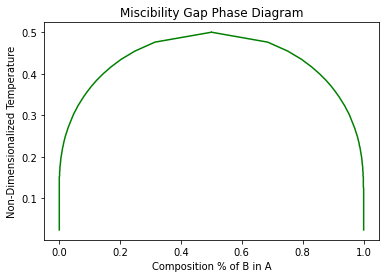

In [0]:
temp = 1 / a 
x_min2 = x_min2 + 0.5

# plotting the results 

plt.plot(x_min1, temp, color = "green")
plt.plot(x_min2, temp, color = "green")
plt.xlabel("Composition % of B in A")
plt.ylabel("Non-Dimensionalized Temperature")
plt.title("Miscibility Gap Phase Diagram")